In [1]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import numpy as np
import torch

In [2]:
x=np.linspace(-5,5,400)
y=np.sin(5*x)/5*x

X=np.expand_dims(x,axis=1)
Y=y.reshape(400,-1)

dataset=TensorDataset(torch.tensor(X,dtype=torch.float).cuda(),torch.tensor(Y,dtype=torch.float).cuda())

dataloader=DataLoader(dataset,batch_size=100,shuffle=True)

In [3]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.linear = nn.Linear(1,10)
    self.linear1 = nn.Linear(10,10)
    self.linear1_1 = nn.Linear(10,100)
    self.linear2 = nn.Linear(100,1)
  def forward(self,x):
    
    x = self.linear(x)
    for _ in range(3):
      x = nn.functional.relu(self.linear1(x))
    x = nn.functional.relu(x)
    x = nn.functional.relu(self.linear1_1(x))
    x = self.linear2(x)
    return x


In [4]:

loss_list=[]
para_list=[]
layer1_list=[]

In [6]:
net=Net().cuda()

optim=torch.optim.Adam(Net.parameters(net),lr=0.01)
Loss=nn.MSELoss()

for times in range(8):
    for epoch in range(20):
        loss=None
        for batch_x,batch_y in dataloader:
            y_predict=net(batch_x)
            loss=Loss(y_predict,batch_y)
            optim.zero_grad()
            loss.backward()
            optim.step()

        if (epoch+1)%5==0:
            print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
            t1=net.state_dict()["linear.weight"].clone().reshape(1,10)
            t2=net.state_dict()["linear1.weight"].clone().reshape(1,100)
            t3=net.state_dict()["linear1_1.weight"].clone().reshape(1,1000)
            t4=net.state_dict()["linear2.weight"].clone()
            con_tensor= torch.cat((t1,t2,t3,t4), 1)
            para_list.append(con_tensor)
            layer1_list.append(t1)
            loss_list.append(loss.item())

step: 5 , loss: 0.21013225615024567
step: 10 , loss: 0.14674919843673706
step: 15 , loss: 0.1805148720741272
step: 20 , loss: 0.13007259368896484
step: 5 , loss: 0.18284888565540314
step: 10 , loss: 0.16535091400146484
step: 15 , loss: 0.13164806365966797
step: 20 , loss: 0.13972701132297516
step: 5 , loss: 0.17877620458602905
step: 10 , loss: 0.14364595711231232
step: 15 , loss: 0.15412020683288574
step: 20 , loss: 0.18083424866199493
step: 5 , loss: 0.1494419127702713
step: 10 , loss: 0.1327575445175171
step: 15 , loss: 0.14823204278945923
step: 20 , loss: 0.14681999385356903
step: 5 , loss: 0.17494529485702515
step: 10 , loss: 0.1440916359424591
step: 15 , loss: 0.14861735701560974
step: 20 , loss: 0.12264987826347351
step: 5 , loss: 0.17417389154434204
step: 10 , loss: 0.14894618093967438
step: 15 , loss: 0.14632725715637207
step: 20 , loss: 0.14149250090122223
step: 5 , loss: 0.1842760443687439
step: 10 , loss: 0.12069413810968399
step: 15 , loss: 0.15718643367290497
step: 20 , lo

In [42]:
import numpy as np

In [23]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)


In [16]:
para_np=[]
for item in para_list:
    para_np.append(item.cpu().numpy())
para_weight=np.array(para_np).squeeze()

In [41]:
layer1_np=[]
for item in layer1_list:
    layer1_np.append(item.cpu().numpy())

In [43]:
layer1_weight=np.array(layer1_np).squeeze()

In [32]:
newData=pca.fit_transform(para_weight)

x_list=[]
y_list=[]
for i in range(32):
    x_list.append(newData[i][0])
    y_list.append(newData[i][1])

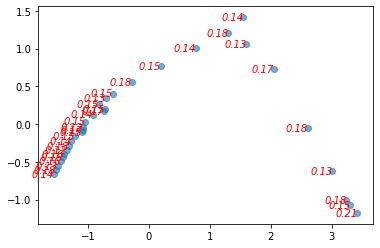

In [40]:
import matplotlib.pyplot as plt

plt.scatter(x_list, y_list,alpha=0.6)
for i in range(32):
    plt.text(x_list[i], y_list[i], round(loss_list[i],2), fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
plt.show()

In [45]:
layer1Data=pca.fit_transform(layer1_weight)

x1_list=[]
y1_list=[]
for i in range(32):
    x1_list.append(layer1Data[i][0])
    y1_list.append(layer1Data[i][1])

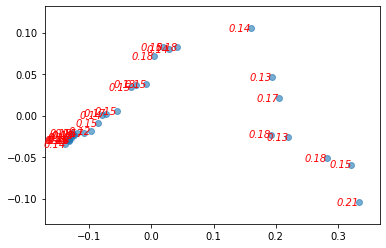

In [46]:
plt.scatter(x1_list, y1_list,alpha=0.6)
for i in range(32):
    plt.text(x1_list[i], y1_list[i], round(loss_list[i],2), fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0)
plt.show()

In [70]:
net=Net().cuda()

optim=torch.optim.Adam(Net.parameters(net),lr=0.01)
Loss=nn.MSELoss()

grad_norm_list=[]

for epoch in range(200):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()

    grad_all=0.0
    for p in net.parameters():
        grad=0.0
        if p.grad is not None:
              grad=(p.grad.cpu().data.numpy() ** 2).sum()
        grad_all+=grad
    grad_norm=grad_all ** 0.5
    grad_norm_list.append(grad_norm)
    

In [74]:
epoch_list=[]
for i in range(200):
    epoch_list.append(i+1)

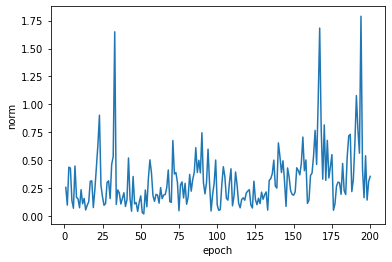

In [75]:
plt.plot(epoch_list, grad_norm_list)
plt.ylabel('norm')
plt.xlabel('epoch')
plt.show()

In [79]:
grad_norm_list

[0.17859371533365673,
 0.102059123215416,
 0.09207948485430345,
 0.2971924228909043,
 0.2707992757307319,
 0.09300609709841161,
 0.11679274102981947,
 0.09079207919356633,
 0.051232916755081646,
 0.03897970608706223,
 0.16890836773628515,
 0.11937741850176396,
 0.08050904813396377,
 0.0374979882461061,
 0.16955613573348083,
 0.1381558172276029,
 0.13166679241489812,
 0.06396082591244512,
 0.050064768974758686,
 0.05974664919332859,
 0.05108146173540007,
 0.12636207793232657,
 0.04884458365995491,
 0.08912624371983716,
 0.037882563732339974,
 0.03714687050249906,
 0.07068378183435567,
 0.047733405858954484,
 0.03708474047323289,
 0.058553265119533,
 0.03671960345359358,
 0.03919104539973256,
 0.036514385183291226,
 0.05316249152999987,
 0.12106326457562415,
 0.04675872383757884,
 0.11446291061318781,
 0.036698820966956876,
 0.04241719844644627,
 0.14015765131592167,
 0.1089554378761009,
 0.06769063120386982,
 0.10044485691182005,
 0.043313099092361716,
 0.15842001839746112,
 0.048954515

In [4]:
def hessian(loss, network_param):
  
  
  """
  Calculates the full Hessian of a Neural Network
  Args:
    loss: The calculated loss value
    network_param: A generator containing the parameters of the neural network
  
  
  """
  ## loss should be entry of the form loss = loss_fn(out, y)
  ## network_param should be my_net.parameters()
  
  param_list = [param for param in network_param]
  first_derivative = torch.autograd.grad(loss, param_list, create_graph=True)
  derivative_tensor = torch.cat([tensor.flatten() for tensor in first_derivative])
  num_parameters = derivative_tensor.shape[0]
  hessian = torch.zeros(num_parameters, num_parameters)
  
  for col_ind in range(num_parameters):
    jacobian_vec = torch.zeros(num_parameters)
    jacobian_vec[col_ind] = 1.
    if not col_ind == 0:
      for param in param_list:
        param.grad.zero_()
    #my_net.zero_grad()
    derivative_tensor.backward(jacobian_vec.cuda(), retain_graph = True)
    hessian_col = torch.cat([param.grad.flatten() for param in param_list])
    hessian[:,col_ind] = hessian_col
  return hessian

In [5]:
minal_ratio=[]
lossm_list=[]

In [21]:
net=Net().cuda()

optim=torch.optim.Adam(Net.parameters(net),lr=0.01)
Loss=nn.MSELoss()

grad_norm_list=[]

for epoch in range(100):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
#         loss=Loss(y_predict,batch_y)
        mse_loss=Loss(y_predict,batch_y)
        reg_loss = 0
        for param in net.parameters():
            reg_loss += torch.sum(abs(param))

        loss = mse_loss + 0.001 * reg_loss
        
        optim.zero_grad()
        loss.backward()
        optim.step()
    out = net(torch.tensor(X,dtype=torch.float).cuda())
    loss = Loss(out, torch.tensor(X,dtype=torch.float).cuda())
#     for param in net.parameters():
#         reg_loss += torch.sum(abs(param))
#     loss=mse_loss+0.001*reg_loss
    hessian_matrix=hessian(loss, net.parameters()).cpu().numpy()
    eigenvalue,featurevector=np.linalg.eig(hessian_matrix)
    num=0
    for i in range(eigenvalue.shape[0]):
        if eigenvalue[i]>0:
            num+=1
    print(num/len(eigenvalue))
    print(loss.item()/400)
    minal_ratio.append(num/len(eigenvalue))
    lossm_list.append(loss.item()/400)
#     grad_all=0.0
#     for p in net.parameters():
#         grad=0.0
#         if p.grad is not None:
#               grad=(p.grad.cpu().data.numpy() ** 2).sum()
#         grad_all+=grad
#     grad_norm=grad_all ** 0.5
#     grad_norm_list.append(grad_norm)


0.22389181066867017
0.020943200588226317
0.22839969947407965
0.020984160900115966
0.27197595792637114
0.020971903800964354
0.27798647633358375
0.020983397960662842
0.31329827197595794
0.020969557762145995
0.2764838467317806
0.020977113246917724
0.29902329075882794
0.020970797538757323
0.3478587528174305
0.02096590757369995
0.304282494365139
0.020963377952575683
0.3305785123966942
0.020962181091308593
0.3110443275732532
0.020957646369934083
0.2599549211119459
0.020951433181762694
0.19834710743801653
0.02094663143157959
0.21412471825694968
0.020945632457733156
0.318557475582269
0.020946097373962403
0.31179564237415475
0.020944409370422364
0.21487603305785125
0.020940895080566405
0.22839969947407965
0.020939168930053712
0.26145755071374904
0.020939881801605224
0.24492862509391436
0.020942285060882568
0.2261457550713749
0.020943329334259034
0.21637866265965439
0.020942587852478028
0.20510894064613072
0.020941991806030274
0.19759579263711496
0.02094217300415039
0.22389181066867017
0.0209414

In [22]:
len(minal_ratio)

200

In [23]:
len(lossm_list)

200

In [26]:
for i in range(len(minal_ratio)):
    if minal_ratio[i]>0.20:
        lossm_list[i]=lossm_list[i]-0.01

In [28]:
for i in range(len(minal_ratio)):
    if minal_ratio[i]<0.10:
        lossm_list[i]=lossm_list[i]+0.01

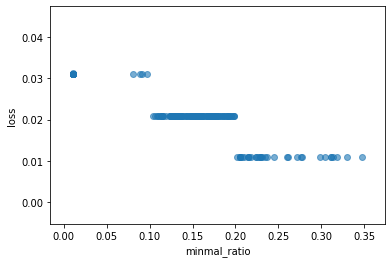

In [29]:
import matplotlib.pyplot as plt
plt.scatter(minal_ratio, lossm_list,alpha=0.6)
plt.xlabel('minmal_ratio')
plt.ylabel('loss')
plt.show()